# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'api_keys'

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []

In [5]:
# Get latitude and temperature for cities
# set up lists to hold reponse info
# records = 0-50
# sets = 1-15,,
record_counter = 0
set_counter = 0
records = []
sets = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
# Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    print(response) 
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    time.sleep(1)
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21, 'feels_like': 17.2, 'temp_min': 21, 'temp_max': 21, 'pressure': 1015, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1612639142, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 1612602587, 'sunset': 1612652334}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}
Processing record 1 of set 0 | mar del plata
{'coord': {'lon': 46.1646, 'lat': 33.1222}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6, 'feels_like': 4.15, 'temp_min': 6, 'temp_max': 6, 'pressure': 1017, 'humidity': 93}, 'visibility': 7000, 'wind': {'speed': 1.03, 'deg': 150}, 'clouds': {'all': 90},

{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.75, 'feels_like': 17.28, 'temp_min': 16.67, 'temp_max': 18.89, 'pressure': 1016, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 1.55, 'deg': 82}, 'clouds': {'all': 0}, 'dt': 1612639313, 'sys': {'type': 3, 'id': 2035800, 'country': 'HK', 'sunrise': 1612652376, 'sunset': 1612692927}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
Processing record 16 of set 0 | victoria
{'coord': {'lon': 22.3479, 'lat': 70.2396}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -3.16, 'feels_like': -10.2, 'temp_min': -3.33, 'temp_max': -3, 'pressure': 1031, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 360}, 'snow': {'1h': 0.35}, 'clouds': {'all': 75}, 'dt': 1612639421, 'sys': {'type': 1, 'id': 1606, 'country': '

{'coord': {'lon': 169.8464, 'lat': -46.2817}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 11.24, 'feels_like': 10.17, 'temp_min': 11.24, 'temp_max': 11.24, 'pressure': 1017, 'humidity': 89, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 1.4, 'deg': 344}, 'clouds': {'all': 5}, 'dt': 1612639438, 'sys': {'country': 'NZ', 'sunrise': 1612633358, 'sunset': 1612685213}, 'timezone': 46800, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
Processing record 32 of set 0 | kaitangata
{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -6.96, 'feels_like': -11.32, 'temp_min': -6.96, 'temp_max': -6.96, 'pressure': 1032, 'humidity': 79, 'sea_level': 1032, 'grnd_level': 1032}, 'visibility': 10000, 'wind': {'speed': 1.86, 'deg': 93}, 'clouds': {'all': 100}, 'dt': 161263943

{'cod': '404', 'message': 'city not found'}
Processing record 47 of set 0 | attawapiskat
City not found. Skipping...
{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.22, 'feels_like': 24.05, 'temp_min': 22.22, 'temp_max': 22.22, 'pressure': 1011, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.39, 'deg': 53}, 'clouds': {'all': 82}, 'dt': 1612639456, 'sys': {'type': 3, 'id': 2011314, 'country': 'ZA', 'sunrise': 1612582779, 'sunset': 1612631606}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
Processing record 48 of set 0 | port alfred
{'coord': {'lon': 106.6861, 'lat': 35.5392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.33, 'feels_like': -2.3, 'temp_min': 1.33, 'temp_max': 1.33, 'pressure': 1024, 'humidity': 64, 'sea_level': 1024, 'grnd_level': 

{'coord': {'lon': 28.1971, 'lat': 55.568}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.55, 'feels_like': -23.12, 'temp_min': -17.55, 'temp_max': -17.55, 'pressure': 1022, 'humidity': 93, 'sea_level': 1022, 'grnd_level': 1006}, 'visibility': 4764, 'wind': {'speed': 2.92, 'deg': 315}, 'clouds': {'all': 80}, 'dt': 1612639473, 'sys': {'country': 'BY', 'sunrise': 1612590639, 'sunset': 1612623118}, 'timezone': 10800, 'id': 629055, 'name': 'Disna', 'cod': 200}
Processing record 12 of set 1 | disna
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.82, 'feels_like': 24.35, 'temp_min': 26.11, 'temp_max': 28, 'pressure': 1010, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1612639474, 'sys': {'type': 1, 'id': 8521, 'country': 'EC'

{'coord': {'lon': 98.7792, 'lat': 1.7427}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.89, 'feels_like': 27.77, 'temp_min': 24.89, 'temp_max': 24.89, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.85, 'deg': 42}, 'clouds': {'all': 85}, 'dt': 1612639492, 'sys': {'country': 'ID', 'sunrise': 1612654650, 'sunset': 1612698034}, 'timezone': 25200, 'id': 1213855, 'name': 'Sibolga', 'cod': 200}
Processing record 29 of set 1 | sibolga
{'coord': {'lon': -115.7999, 'lat': 60.8156}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -34.94, 'feels_like': -39.95, 'temp_min': -37, 'temp_max': -33, 'pressure': 1037, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 250}, 'clouds': {'all': 58}, 'dt': 1612639206, 'sys': {'type': 1, 'id': 1036, 'country':

{'coord': {'lon': 46.7219, 'lat': 24.6877}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 17, 'feels_like': 14.6, 'temp_min': 17, 'temp_max': 17, 'pressure': 1017, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1612639488, 'sys': {'type': 1, 'id': 7426, 'country': 'SA', 'sunrise': 1612582372, 'sunset': 1612622493}, 'timezone': 10800, 'id': 108410, 'name': 'Riyadh', 'cod': 200}
Processing record 44 of set 1 | riyadh
{'coord': {'lon': -45.2371, 'lat': 60.1432}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -5.35, 'feels_like': -9.72, 'temp_min': -5.35, 'temp_max': -5.35, 'pressure': 1019, 'humidity': 78, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 33}, 'clouds': {'all': 0}, 'dt': 1612639512, 'sys': {'country': 'GL', 'sunrise'

{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 31.13, 'temp_min': 27, 'temp_max': 27, 'pressure': 1002, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1612639527, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1612649194, 'sunset': 1612696360}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}
Processing record 8 of set 2 | carnarvon
{'coord': {'lon': 96.37, 'lat': 61.67}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -13.61, 'feels_like': -18.55, 'temp_min': -13.61, 'temp_max': -13.61, 'pressure': 1010, 'humidity': 91, 'sea_level': 1010, 'grnd_level': 991}, 'visibility': 131, 'wind': {'speed': 2.26, 'deg': 164}, 'snow': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1612639528, 'sy

{'coord': {'lon': 70.3667, 'lat': 20.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.9, 'feels_like': 15.92, 'temp_min': 20.9, 'temp_max': 20.9, 'pressure': 1015, 'humidity': 32, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 5.12, 'deg': 33}, 'clouds': {'all': 0}, 'dt': 1612639543, 'sys': {'country': 'IN', 'sunrise': 1612662779, 'sunset': 1612703545}, 'timezone': 19800, 'id': 1253237, 'name': 'Verāval', 'cod': 200}
Processing record 23 of set 2 | veraval
{'coord': {'lon': 72.9333, 'lat': 0.5333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.66, 'feels_like': 28.42, 'temp_min': 27.66, 'temp_max': 27.66, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 21}, 'clouds': {'all': 11}, 'dt': 1612639544, 'sys': {'country': '

{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.46, 'feels_like': 23.51, 'temp_min': 24.46, 'temp_max': 24.46, 'pressure': 1008, 'humidity': 48, 'sea_level': 1008, 'grnd_level': 900}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 206}, 'clouds': {'all': 0}, 'dt': 1612639506, 'sys': {'country': 'BR', 'sunrise': 1612602053, 'sunset': 1612649247}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
Processing record 39 of set 2 | castro
{'coord': {'lon': -173.3, 'lat': 64.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.53, 'feels_like': -22.87, 'temp_min': -17.53, 'temp_max': -17.53, 'pressure': 1038, 'humidity': 91, 'sea_level': 1038, 'grnd_level': 1038}, 'visibility': 8644, 'wind': {'speed': 2.58, 'deg': 38}, 'clouds': {'all': 95}, 'dt': 1612639562, 'sys'

{'cod': '404', 'message': 'city not found'}
Processing record 4 of set 3 | meyungs
City not found. Skipping...
{'coord': {'lon': 129.5078, 'lat': 42.9075}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -12.89, 'feels_like': -17.62, 'temp_min': -12.89, 'temp_max': -12.89, 'pressure': 1022, 'humidity': 90, 'sea_level': 1022, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 304}, 'clouds': {'all': 38}, 'dt': 1612639580, 'sys': {'country': 'CN', 'sunrise': 1612650625, 'sunset': 1612687310}, 'timezone': 28800, 'id': 2033467, 'name': 'Yanji', 'cod': 200}
Processing record 5 of set 3 | yanji
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -23.18, 'feels_like': -28.02, 'temp_min': -23.89, 'temp_max': -2

{'coord': {'lon': -83.1592, 'lat': 22.9036}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.97, 'feels_like': 29.31, 'temp_min': 28.97, 'temp_max': 28.97, 'pressure': 1012, 'humidity': 65, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 6.01, 'deg': 165}, 'clouds': {'all': 9}, 'dt': 1612639326, 'sys': {'country': 'CU', 'sunrise': 1612613392, 'sunset': 1612653819}, 'timezone': -18000, 'id': 3567995, 'name': 'Bahía Honda', 'cod': 200}
Processing record 21 of set 3 | bahia honda
{'coord': {'lon': 122.7475, 'lat': 40.8516}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -6.05, 'feels_like': -11.87, 'temp_min': -6.05, 'temp_max': -6.05, 'pressure': 1026, 'humidity': 93, 'sea_level': 1026, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4.31, 'deg': 354}, 'clouds': {'all': 14}, 'dt': 1612639598,

{'coord': {'lon': 9.7833, 'lat': 7.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 29.24, 'feels_like': 25.93, 'temp_min': 29.24, 'temp_max': 29.24, 'pressure': 1008, 'humidity': 14, 'sea_level': 1008, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 49}, 'clouds': {'all': 0}, 'dt': 1612639614, 'sys': {'country': 'NG', 'sunrise': 1612590017, 'sunset': 1612632579}, 'timezone': 3600, 'id': 2318921, 'name': 'Wukari', 'cod': 200}
Processing record 36 of set 3 | wukari
{'coord': {'lon': 52.3154, 'lat': 54.9044}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.34, 'feels_like': -26.73, 'temp_min': -18.34, 'temp_max': -18.34, 'pressure': 998, 'humidity': 90, 'sea_level': 998, 'grnd_level': 982}, 'visibility': 1425, 'wind': {'speed': 6.88, 'deg': 261}, 'clouds': {'all': 100}, 'dt': 1612639615, 'sys': {'count

{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.56, 'feels_like': 20.33, 'temp_min': 20.56, 'temp_max': 20.56, 'pressure': 1014, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 4.4, 'deg': 248}, 'clouds': {'all': 0}, 'dt': 1612639630, 'sys': {'type': 3, 'id': 2035063, 'country': 'ZA', 'sunrise': 1612583255, 'sunset': 1612632166}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
Processing record 0 of set 4 | kruisfontein
{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 5.13, 'feels_like': -2.29, 'temp_min': 4, 'temp_max': 6, 'pressure': 1015, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 250, 'gust': 12.35}, 'clouds': {'all': 40}, 'dt': 1612639469, 'sys': {'type': 1, 'id': 3888, 'country': 'U

{'coord': {'lon': 82.2167, 'lat': 16.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.12, 'feels_like': 20.34, 'temp_min': 19.12, 'temp_max': 19.12, 'pressure': 1014, 'humidity': 80, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.87, 'deg': 62}, 'clouds': {'all': 61}, 'dt': 1612639648, 'sys': {'country': 'IN', 'sunrise': 1612659634, 'sunset': 1612701001}, 'timezone': 19800, 'id': 1252795, 'name': 'Yanam', 'cod': 200}
Processing record 16 of set 4 | yanam
{'coord': {'lon': 14.7644, 'lat': -4.3614}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25, 'feels_like': 28.42, 'temp_min': 25, 'temp_max': 25, 'pressure': 1011, 'humidity': 83}, 'visibility': 8000, 'wind': {'speed': 1.76, 'deg': 209}, 'rain': {'1h': 0.21}, 'clouds': {'all': 5}, 'dt': 1612639649, 'sys': {'type': 1, 'id': 2024, 'country'

{'cod': '404', 'message': 'city not found'}
Processing record 33 of set 4 | lolua
City not found. Skipping...
{'coord': {'lon': 121.753, 'lat': 24.757}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.08, 'feels_like': 17.38, 'temp_min': 15.56, 'temp_max': 16.67, 'pressure': 1011, 'humidity': 99}, 'visibility': 10000, 'wind': {'speed': 0.94, 'deg': 238}, 'clouds': {'all': 0}, 'dt': 1612639668, 'sys': {'type': 3, 'id': 256500, 'country': 'TW', 'sunrise': 1612650744, 'sunset': 1612690913}, 'timezone': 28800, 'id': 1674199, 'name': 'Yilan', 'cod': 200}
Processing record 34 of set 4 | yilan
{'cod': '404', 'message': 'city not found'}
Processing record 35 of set 4 | tsihombe
City not found. Skipping...
{'coord': {'lon': -10.0711, 'lat': 20.5022}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.89, 'feels_like': 12.5, 'temp_min': 1

{'coord': {'lon': 118.3, 'lat': 6.0833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.84, 'feels_like': 31.02, 'temp_min': 26.67, 'temp_max': 27, 'pressure': 1008, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1612639692, 'sys': {'type': 1, 'id': 9374, 'country': 'PH', 'sunrise': 1612650251, 'sunset': 1612693063}, 'timezone': 28800, 'id': 1684606, 'name': 'Taganak', 'cod': 200}
Processing record 49 of set 4 | taganak
{'coord': {'lon': 57.0788, 'lat': 30.2832}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9, 'feels_like': 4.15, 'temp_min': 9, 'temp_max': 9, 'pressure': 1019, 'humidity': 14}, 'visibility': 10000, 'wind': {'speed': 1.97, 'deg': 251}, 'clouds': {'all': 0}, 'dt': 1612639693, 'sys': {'type': 1, 'id': 7478, 'country': 'IR', 'sunrise': 1612580356, 'sunset':

{'coord': {'lon': -50.5706, 'lat': -14.7447}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.57, 'feels_like': 31.43, 'temp_min': 28.57, 'temp_max': 28.57, 'pressure': 1007, 'humidity': 71, 'sea_level': 1007, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 3.24, 'deg': 16}, 'rain': {'1h': 2.1772}, 'clouds': {'all': 100}, 'dt': 1612639708, 'sys': {'country': 'BR', 'sunrise': 1612602964, 'sunset': 1612648603}, 'timezone': -10800, 'id': 3456642, 'name': 'Mozarlândia', 'cod': 200}
Processing record 13 of set 5 | mozarlandia
{'coord': {'lon': -111.9018, 'lat': 51.6334}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -23.33, 'feels_like': -27.71, 'temp_min': -23.33, 'temp_max': -23.33, 'pressure': 1032, 'humidity': 80}, 'visibility': 854, 'wind': {'speed': 0.89, 'deg': 138, 'gust': 1.34}, 'clouds': {'all': 100}, 'dt': 

{'coord': {'lon': 140.1822, 'lat': 53.2514}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -21.58, 'feels_like': -26.89, 'temp_min': -21.58, 'temp_max': -21.58, 'pressure': 1016, 'humidity': 90, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 1224, 'wind': {'speed': 2.33, 'deg': 252}, 'clouds': {'all': 100}, 'dt': 1612639727, 'sys': {'country': 'RU', 'sunrise': 1612649617, 'sunset': 1612683194}, 'timezone': 36000, 'id': 2123621, 'name': 'Mago', 'cod': 200}
Processing record 30 of set 5 | mago
{'cod': '404', 'message': 'city not found'}
Processing record 31 of set 5 | bargal
City not found. Skipping...
{'coord': {'lon': 135.8, 'lat': 62.2167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -31.86, 'feels_like': -36.11, 'temp_min': -31.86, 'temp_max': -31.86, 'pressure': 1035, 'humidity': 85, 'sea_level': 1035, 'grnd_

{'coord': {'lon': 63.471, 'lat': 25.2631}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.02, 'feels_like': 19.16, 'temp_min': 20.02, 'temp_max': 20.02, 'pressure': 1019, 'humidity': 47, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 0.69, 'deg': 197}, 'clouds': {'all': 0}, 'dt': 1612639745, 'sys': {'country': 'PK', 'sunrise': 1612664766, 'sunset': 1612704867}, 'timezone': 18000, 'id': 1168312, 'name': 'Pasni', 'cod': 200}
Processing record 46 of set 5 | pasni
{'coord': {'lon': 33.6442, 'lat': -25.0519}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.66, 'feels_like': 27, 'temp_min': 24.66, 'temp_max': 24.66, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 138}, 'clouds': {'all': 100}, 'dt': 1612639728, 'sys': {'cou

{'coord': {'lon': 173.1667, 'lat': -35.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.56, 'feels_like': 14.81, 'temp_min': 15.56, 'temp_max': 15.56, 'pressure': 1018, 'humidity': 85, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.43, 'deg': 107}, 'clouds': {'all': 87}, 'dt': 1612639763, 'sys': {'country': 'NZ', 'sunrise': 1612633946, 'sunset': 1612683031}, 'timezone': 46800, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}
Processing record 11 of set 6 | ahipara
{'coord': {'lon': 91.6419, 'lat': 48.0056}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -12.76, 'feels_like': -16.55, 'temp_min': -12.76, 'temp_max': -12.76, 'pressure': 1029, 'humidity': 91, 'sea_level': 1029, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 0.68, 'deg': 68}, 'clouds': {'all': 0}, 'dt': 1612639681, 's

{'coord': {'lon': 38.0867, 'lat': 40.1644}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.8, 'feels_like': -0.69, 'temp_min': 1.8, 'temp_max': 1.8, 'pressure': 1021, 'humidity': 80, 'sea_level': 1021, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 0.46, 'deg': 104}, 'clouds': {'all': 0}, 'dt': 1612639780, 'sys': {'country': 'TR', 'sunrise': 1612585895, 'sunset': 1612623115}, 'timezone': 10800, 'id': 739209, 'name': 'Suşehri', 'cod': 200}
Processing record 27 of set 6 | susehri
{'coord': {'lon': 39.5471, 'lat': 39.1083}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 0.68, 'feels_like': -3.79, 'temp_min': -2, 'temp_max': 2, 'pressure': 1020, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1612639771, 'sys': {'type': 1, 'id': 6983, 'country': 'TR', 'sunrise': 1612585427

{'coord': {'lon': 38.9833, 'lat': -10}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.57, 'feels_like': 25.85, 'temp_min': 22.57, 'temp_max': 22.57, 'pressure': 1009, 'humidity': 96, 'sea_level': 1009, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 1.96, 'deg': 65}, 'clouds': {'all': 100}, 'dt': 1612639797, 'sys': {'country': 'TZ', 'sunrise': 1612581803, 'sunset': 1612626777}, 'timezone': 10800, 'id': 878006, 'name': 'Mbekenyera', 'cod': 200}
Processing record 42 of set 6 | mbekenyera
{'coord': {'lon': -70.3333, 'lat': -27.3667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 21, 'feels_like': 17.99, 'temp_min': 21, 'temp_max': 21, 'pressure': 1013, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 270}, 'clouds': {'all': 20}, 'dt': 1612639618, 'sys': {'type': 1, 'id': 8481, 'country': 'CL', '

{'coord': {'lon': -52.3333, 'lat': 4.9333}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 29.88, 'temp_min': 26, 'temp_max': 26, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 20}, 'rain': {'1h': 3.07}, 'clouds': {'all': 90}, 'dt': 1612639736, 'sys': {'type': 1, 'id': 8669, 'country': 'GF', 'sunrise': 1612604729, 'sunset': 1612647685}, 'timezone': -10800, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
Processing record 6 of set 7 | cayenne
{'coord': {'lon': 118.5667, 'lat': -20.3167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25, 'feels_like': 28.37, 'temp_min': 25, 'temp_max': 25, 'pressure': 1004, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1612639765, 'sys': {'type': 1, 'id': 9585, 'country': 'AU', 'sun

{'coord': {'lon': -77.5714, 'lat': 40.5992}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 2.33, 'feels_like': -8.76, 'temp_min': 1.67, 'temp_max': 3.33, 'pressure': 1017, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 11.32, 'deg': 260, 'gust': 16.46}, 'clouds': {'all': 1}, 'dt': 1612639834, 'sys': {'type': 1, 'id': 5732, 'country': 'US', 'sunrise': 1612613681, 'sunset': 1612650847}, 'timezone': -18000, 'id': 5197850, 'name': 'Lewistown', 'cod': 200}
Processing record 21 of set 7 | lewistown
{'coord': {'lon': 11.9167, 'lat': 50.3167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.21, 'feels_like': -6.33, 'temp_min': -1.11, 'temp_max': 0.56, 'pressure': 1007, 'humidity': 98}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 89, 'gust': 8.05}, 'snow': {'1h': 0.15}, 'clouds': {'all': 100}, 'dt': 1612639835, 'sys': {'type'

{'coord': {'lon': 141.3028, 'lat': -2.6741}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.93, 'feels_like': 28.52, 'temp_min': 24.93, 'temp_max': 24.93, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.05, 'deg': 208}, 'rain': {'1h': 0.7892}, 'clouds': {'all': 94}, 'dt': 1612639850, 'sys': {'country': 'PG', 'sunrise': 1612644153, 'sunset': 1612688120}, 'timezone': 36000, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}
Processing record 36 of set 7 | vanimo
{'coord': {'lon': 14.5329, 'lat': 40.922}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.02, 'feels_like': 12.14, 'temp_min': 12.78, 'temp_max': 15, 'pressure': 1011, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 1.64, 'deg': 107}, 'clouds': {'all': 10}, 'dt': 1612639851, 'sys': {'type': 3, 'id': 2002111

{'coord': {'lon': 55.2707, 'lat': -21.0096}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.39, 'feels_like': 23.47, 'temp_min': 19.44, 'temp_max': 24, 'pressure': 1012, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1612639867, 'sys': {'type': 1, 'id': 2133, 'country': 'RE', 'sunrise': 1612577080, 'sunset': 1612623681}, 'timezone': 14400, 'id': 935221, 'name': 'Saint-Paul', 'cod': 200}
Processing record 0 of set 8 | saint-paul
{'coord': {'lon': 153.5667, 'lat': -28.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.31, 'feels_like': 23.93, 'temp_min': 20.56, 'temp_max': 22, 'pressure': 1004, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1612639868, 'sys': {'type': 1, 'id': 9496, 'country': 'AU', 'sun

{'coord': {'lon': -9.0603, 'lat': 42.7762}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 8.17, 'feels_like': 5.81, 'temp_min': 7.78, 'temp_max': 8.89, 'pressure': 1012, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 339, 'gust': 13.41}, 'clouds': {'all': 35}, 'dt': 1612639705, 'sys': {'type': 3, 'id': 2000018, 'country': 'ES', 'sunrise': 1612597509, 'sunset': 1612634132}, 'timezone': 3600, 'id': 3115824, 'name': 'Muros', 'cod': 200}
Processing record 15 of set 8 | muros
{'coord': {'lon': 126.2925, 'lat': 58.9564}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -30.35, 'feels_like': -34.71, 'temp_min': -30.35, 'temp_max': -30.35, 'pressure': 1034, 'humidity': 82, 'sea_level': 1034, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 0.7, 'deg': 158}, 'clouds': {'all': 98}, 'dt': 1612639885, '

{'coord': {'lon': -69.4333, 'lat': -15.4667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.69, 'feels_like': 7.8, 'temp_min': 12.69, 'temp_max': 12.69, 'pressure': 1012, 'humidity': 64, 'sea_level': 1012, 'grnd_level': 646}, 'visibility': 10000, 'wind': {'speed': 5.69, 'deg': 126}, 'clouds': {'all': 31}, 'dt': 1612639901, 'sys': {'country': 'PE', 'sunrise': 1612607440, 'sunset': 1612653182}, 'timezone': -18000, 'id': 3931137, 'name': 'Putina', 'cod': 200}
Processing record 30 of set 8 | putina
{'coord': {'lon': -121.4238, 'lat': 38.421}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 13.94, 'feels_like': 11.96, 'temp_min': 12, 'temp_max': 15, 'pressure': 1021, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1612639902, 'sys': {'type': 1, 'id': 5769, 'country': 'US', 'su

{'coord': {'lon': -65.7125, 'lat': 66.1451}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -10, 'feels_like': -14.7, 'temp_min': -10, 'temp_max': -10, 'pressure': 1024, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1612639918, 'sys': {'type': 1, 'id': 968, 'country': 'CA', 'sunrise': 1612616492, 'sunset': 1612642344}, 'timezone': -18000, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}
Processing record 45 of set 8 | pangnirtung
{'coord': {'lon': 36.2, 'lat': 36.9559}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15, 'feels_like': 15.31, 'temp_min': 15, 'temp_max': 15, 'pressure': 1018, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.58, 'deg': 89}, 'clouds': {'all': 0}, 'dt': 1612639919, 'sys': {'type': 3, 'id': 2007718, 'country': 'TR', 'sunrise': 1612586000, '

{'coord': {'lon': 118.3319, 'lat': 63.2842}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -35.98, 'feels_like': -40.59, 'temp_min': -35.98, 'temp_max': -35.98, 'pressure': 1029, 'humidity': 84, 'sea_level': 1029, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 0.98, 'deg': 109}, 'clouds': {'all': 28}, 'dt': 1612639935, 'sys': {'country': 'RU', 'sunrise': 1612657437, 'sunset': 1612685862}, 'timezone': 32400, 'id': 2018735, 'name': 'Nyurba', 'cod': 200}
Processing record 10 of set 9 | nyurba
{'coord': {'lon': 74.3167, 'lat': 28.2833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.76, 'feels_like': 12.48, 'temp_min': 15.76, 'temp_max': 15.76, 'pressure': 1019, 'humidity': 32, 'sea_level': 1019, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 1.67, 'deg': 157}, 'clouds': {'all': 0}, 'dt': 1612639936, 'sy

{'coord': {'lon': 14.6357, 'lat': 63.1792}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -11, 'feels_like': -16, 'temp_min': -11, 'temp_max': -11, 'pressure': 1029, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 270}, 'clouds': {'all': 90}, 'dt': 1612639952, 'sys': {'type': 1, 'id': 1774, 'country': 'SE', 'sunrise': 1612596014, 'sunset': 1612624253}, 'timezone': 3600, 'id': 2685750, 'name': 'Östersund', 'cod': 200}
Processing record 25 of set 9 | ostersund
{'coord': {'lon': 103.95, 'lat': 22.4833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.77, 'feels_like': 20.22, 'temp_min': 18.77, 'temp_max': 18.77, 'pressure': 1015, 'humidity': 78, 'sea_level': 1015, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 0.16, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1612639953, 'sys': {'country': 'VN'

{'coord': {'lon': 110.026, 'lat': 25.3378}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 11, 'feels_like': 10.69, 'temp_min': 11, 'temp_max': 11, 'pressure': 1017, 'humidity': 100}, 'visibility': 5000, 'wind': {'speed': 0.9, 'deg': 21}, 'clouds': {'all': 0}, 'dt': 1612639969, 'sys': {'type': 1, 'id': 9626, 'country': 'CN', 'sunrise': 1612653603, 'sunset': 1612693683}, 'timezone': 28800, 'id': 1992517, 'name': 'Baoning', 'cod': 200}
Processing record 40 of set 9 | baoning
{'coord': {'lon': -42.8589, 'lat': -17.8572}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.96, 'feels_like': 23.29, 'temp_min': 20.96, 'temp_max': 20.96, 'pressure': 1010, 'humidity': 93, 'sea_level': 1010, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 4}, 'clouds': {'all': 93}, 'dt': 1612639970, 'sys': {'country': 'BR', 'sunrise': 1612

{'coord': {'lon': 175.5153, 'lat': -41.4122}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.85, 'feels_like': 13.67, 'temp_min': 12, 'temp_max': 16.11, 'pressure': 1020, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 40}, 'clouds': {'all': 93}, 'dt': 1612639986, 'sys': {'type': 1, 'id': 7358, 'country': 'NZ', 'sunrise': 1612632667, 'sunset': 1612683182}, 'timezone': 46800, 'id': 2206874, 'name': 'Waipawa', 'cod': 200}
Processing record 5 of set 10 | waipawa
{'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25, 'feels_like': 23, 'temp_min': 25, 'temp_max': 25, 'pressure': 1015, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1612639988, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1612605092

{'coord': {'lon': 42.6667, 'lat': 17.3333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24, 'feels_like': 26.58, 'temp_min': 24, 'temp_max': 24, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1612640003, 'sys': {'type': 1, 'id': 7407, 'country': 'SA', 'sunrise': 1612582787, 'sunset': 1612624024}, 'timezone': 10800, 'id': 105298, 'name': 'Jizan', 'cod': 200}
Processing record 20 of set 10 | jizan
{'coord': {'lon': 80.217, 'lat': 6.0367}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.86, 'feels_like': 27.31, 'temp_min': 24.86, 'temp_max': 24.86, 'pressure': 1011, 'humidity': 86, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 86}, 'clouds': {'all': 99}, 'dt': 1612639706, 'sys': {'country': 'LK', 'sunrise': 16

{'coord': {'lon': 135.8833, 'lat': 46.4856}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -25.02, 'feels_like': -29.56, 'temp_min': -25.02, 'temp_max': -25.02, 'pressure': 1021, 'humidity': 90, 'sea_level': 1021, 'grnd_level': 941}, 'visibility': 1564, 'wind': {'speed': 1.11, 'deg': 232}, 'clouds': {'all': 100}, 'dt': 1612640019, 'sys': {'country': 'RU', 'sunrise': 1612649560, 'sunset': 1612685314}, 'timezone': 36000, 'id': 2013279, 'name': 'Vostok', 'cod': 200}
Processing record 35 of set 10 | vostok
{'coord': {'lon': 48.1831, 'lat': 31.5608}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17, 'feels_like': 15.03, 'temp_min': 17, 'temp_max': 17, 'pressure': 1014, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1612640021, 'sys': {'type': 1, 'id': 7451, 'country': '

{'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.12, 'feels_like': 28.69, 'temp_min': 27.12, 'temp_max': 27.12, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg': 75}, 'clouds': {'all': 0}, 'dt': 1612640036, 'sys': {'country': 'MV', 'sunrise': 1612660979, 'sunset': 1612704096}, 'timezone': 18000, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}
Processing record 50 of set 10 | mahibadhoo
{'coord': {'lon': 4.7593, 'lat': 52.9599}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.12, 'feels_like': -11.02, 'temp_min': 0, 'temp_max': 0.56, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 12.35, 'deg': 80, 'gust': 17.49}, 'clouds': {'all': 90}, 'dt': 1612640037, 'sys': {'type': 1, 'id': 1533, 

{'coord': {'lon': -71.3436, 'lat': -29.9533}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 20, 'feels_like': 16.61, 'temp_min': 20, 'temp_max': 20, 'pressure': 1014, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1612640054, 'sys': {'type': 1, 'id': 8514, 'country': 'CL', 'sunrise': 1612606722, 'sunset': 1612654817}, 'timezone': -10800, 'id': 3893629, 'name': 'Coquimbo', 'cod': 200}
Processing record 15 of set 11 | coquimbo
{'coord': {'lon': 14.1786, 'lat': 8.6724}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.11, 'feels_like': 22.87, 'temp_min': 26.11, 'temp_max': 26.11, 'pressure': 1011, 'humidity': 17, 'sea_level': 1011, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 2}, 'clouds': {'all': 0}, 'dt': 1612640055, 'sys': {'country': 'CM', 'sunrise'

{'coord': {'lon': -105.2842, 'lat': 55.1001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -31, 'feels_like': -37.07, 'temp_min': -31, 'temp_max': -31, 'pressure': 1031, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 300}, 'clouds': {'all': 61}, 'dt': 1612640071, 'sys': {'type': 1, 'id': 696, 'country': 'CA', 'sunrise': 1612622531, 'sunset': 1612655301}, 'timezone': -21600, 'id': 6050066, 'name': 'La Ronge', 'cod': 200}
Processing record 30 of set 11 | la ronge
{'coord': {'lon': 110.2833, 'lat': -7.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.5, 'feels_like': 27.79, 'temp_min': 24.5, 'temp_max': 24.5, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.16, 'deg': 41}, 'clouds': {'all': 66}, 'dt': 1612640072, 'sys': {'country': 'ID'

{'coord': {'lon': -8.1588, 'lat': 42.0304}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.67, 'feels_like': 3.73, 'temp_min': 6.67, 'temp_max': 6.67, 'pressure': 1011, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 35}, 'clouds': {'all': 80}, 'dt': 1612640087, 'sys': {'type': 3, 'id': 2007751, 'country': 'PT', 'sunrise': 1612597202, 'sunset': 1612634006}, 'timezone': 0, 'id': 7117100, 'name': 'Vila', 'cod': 200}
Processing record 45 of set 11 | vila
{'coord': {'lon': 78.661, 'lat': 54.7021}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.55, 'feels_like': -7.68, 'temp_min': -0.55, 'temp_max': -0.55, 'pressure': 1006, 'humidity': 97, 'sea_level': 1006, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 7.15, 'deg': 154}, 'clouds': {'all': 99}, 'dt': 1612640088, 'sys': {'country': 'RU', 'sun

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
                "city": cities,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": Humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp_max,
                "Wind Speed": wind_speed
                }
weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})
weather_data.head()

<ipython-input-7-ce46298f08ea>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})


,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,saint george,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,lompoc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,vaini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,puerto ayora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Save dataframe to a new CSV file
weather_data.to_csv("city_weather.csv",
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

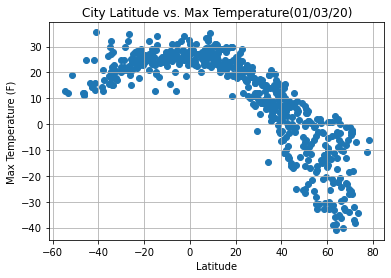

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/03/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

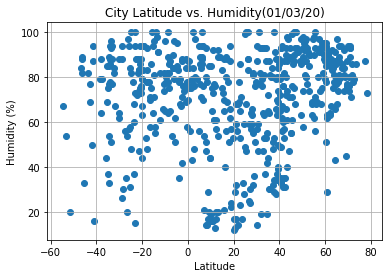

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(01/03/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

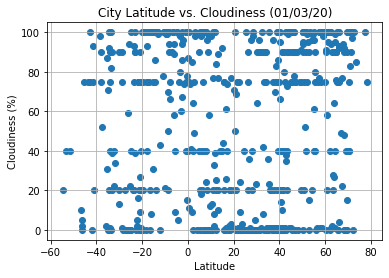

In [24]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/03/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

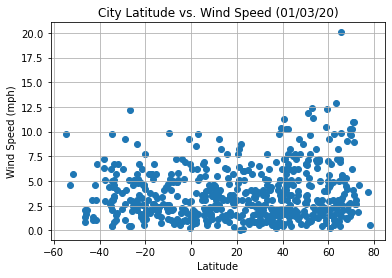

In [25]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/03/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [3]:
def LinearRegressionplot(x_values, y_values):

# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    regress_values = x_values * slope + intercept
# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_data.loc[weather_data['Lat'] > 0] 
Sorthern_Hemisphere = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

In [ ]:
Observation 1: higher the latitude, lower the Temperature in Northern Hemisphere.

Observation 2: the cloudness does not show relationship with latitude.

Observation 3: the wind speed usually between 0 to 10 mph, some cities in Northern Hemisphere may occur higher wind speed.